# Explore the `murders` dataset in the `dslabs` package

This notebook analyzes a datasets in the `dslabs` package while touching upon some fundamental data-exploratory tools in R.

Again, all of the syntax used here is explained in the readme file of this repository.

## Topics in a gist
1. Loading the required dataset
2. Getting familiar with the dataset
3. Data exploration in the dataset
4. Data wrangling using `dplyr`
5. Working with graphs (scatterplots, historgrams, boxplots)

## Required

Make sure to download the `dslabs` and `dplyr` packages to your system before beginning its exploration.
### Steps
#### Install the `dslabs` package
1. Open an `R` console.
2. Enter: `install.packages("dslabs")`
3. Select a mirror, and begin installation.

#### Install the `dplyr` package
Within the same `R` console:
1. Enter: `install.packages("dslabs")`
2. Select a mirror, and begin installation.

After the installations are complete, the dataset exploration begins as follows.

## 1. Load the dataset required in this script

In [5]:
library(dslabs)
data(murders)

In [6]:
class (murders)

[1] "data.frame"

## 2. Get familiar with the dataset

In [7]:
str(murders) # structure of the dataset

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...


In [8]:
head(murders) # first 6 rows

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [14]:
# Print the regions attribute
regions = murders$region
print (regions)

 [1] South         West          West          South         West         
 [6] West          Northeast     South         South         South        
[11] South         West          West          North Central North Central
[16] North Central North Central South         South         Northeast    
[21] South         Northeast     North Central North Central South        
[26] North Central West          North Central West          Northeast    
[31] Northeast     West          Northeast     South         North Central
[36] North Central South         West          Northeast     Northeast    
[41] South         North Central South         South         West         
[46] Northeast     South         West          South         North Central
[51] West         
Levels: Northeast South North Central West


In [15]:
class(regions) # FACTOR -- used to store categorical data


[1] "factor"

In [23]:
# Sort the total murders in ascending order
totals = murders$total
print("Total murders")
totals
print("Sorted murders")
sort(totals)

[1] "Total murders"


[1]  135   19  232   93 1257   65   97   38   99  669  376    7   12  364  142
[16]   21   63  116  351   11  293  118  413   53  120  321   12   32   84    5
[31]  246   67  517  286    4  310  111   36  457   16  207    8  219  805   22
[46]    2  250   93   27   97    5

[1] "Sorted murders"


[1]    2    4    5    5    7    8   11   12   12   16   19   21   22   27   32
[16]   36   38   53   63   65   67   84   93   93   97   97   99  111  116  118
[31]  120  135  142  207  219  232  246  250  286  293  310  321  351  364  376
[46]  413  457  517  669  805 1257

In [26]:
# Display the state names according to their total murders in ascending order

orders = order(totals) # returns the multivalued index vector required to sort the integers
states = murders$state[orders] # access the state column in murders, and index them as per their total murders order. Also: VECTORS CAN BE INDEXED WITH LOGICALS!
print("States from lowest murder rate till highest")
print(states)

[1] "States from lowest murder rate till highest"
 [1] "Vermont"              "North Dakota"         "New Hampshire"       
 [4] "Wyoming"              "Hawaii"               "South Dakota"        
 [7] "Maine"                "Idaho"                "Montana"             
[10] "Rhode Island"         "Alaska"               "Iowa"                
[13] "Utah"                 "West Virginia"        "Nebraska"            
[16] "Oregon"               "Delaware"             "Minnesota"           
[19] "Kansas"               "Colorado"             "New Mexico"          
[22] "Nevada"               "Arkansas"             "Washington"          
[25] "Connecticut"          "Wisconsin"            "District of Columbia"
[28] "Oklahoma"             "Kentucky"             "Massachusetts"       
[31] "Mississippi"          "Alabama"              "Indiana"             
[34] "South Carolina"       "Tennessee"            "Arizona"             
[37] "New Jersey"           "Virginia"             "North Caro

In [27]:
# Create a sub-table (data-frame) from the murders table with state names and their total murders in ascending order
sub_murders = data.frame(state_name = states, total_murders = totals[orders])
head(sub_murders) # display the first 6 entries
tail(sub_murders) # display the last 6 entries


state_name,total_murders
Vermont,2
North Dakota,4
New Hampshire,5
Wyoming,5
Hawaii,7
South Dakota,8


,state_name,total_murders
46,Michigan,413
47,Pennsylvania,457
48,New York,517
49,Florida,669
50,Texas,805
51,California,1257


## 3. Dataset exploration: Work with "murder rates"

_Murder rate_ is defined as the number of murders per capita, that is per 100000 people of population.

In [34]:
pops = murders$population
# Define a murder_rate column
murder_rate = (totals / pops) * 100000
print("State names are per their murder rates in descending order")
states = murders$state
print(states[order(murder_rate, decreasing=TRUE)]) # print the state names in the order of their murder rates in decreasing order

[1] "State names are per their murder rates in descending order"
 [1] "District of Columbia" "Louisiana"            "Missouri"            
 [4] "Maryland"             "South Carolina"       "Delaware"            
 [7] "Michigan"             "Mississippi"          "Georgia"             
[10] "Arizona"              "Pennsylvania"         "Tennessee"           
[13] "Florida"              "California"           "New Mexico"          
[16] "Texas"                "Arkansas"             "Virginia"            
[19] "Nevada"               "North Carolina"       "Oklahoma"            
[22] "Illinois"             "Alabama"              "New Jersey"          
[25] "Connecticut"          "Ohio"                 "Alaska"              
[28] "Kentucky"             "New York"             "Kansas"              
[31] "Indiana"              "Massachusetts"        "Nebraska"            
[34] "Wisconsin"            "Rhode Island"         "West Virginia"       
[37] "Washington"           "Colorado"         

In [31]:
# Print those states whose murder rates are less than 1
test_cond = murder_rate < 1
print("States with low murder rates")
states [test_cond]

[1] "States with low murder rates"


[1] "Hawaii"        "Idaho"         "Iowa"          "Maine"        
 [5] "Minnesota"     "New Hampshire" "North Dakota"  "Oregon"       
 [9] "South Dakota"  "Utah"          "Vermont"       "Wyoming"

In [32]:
# Find the indices of Nevada, Maine and Kansas using match(...), and then find their murder rates
reqd_states = c("Nevada", "Maine", "Kansas")
ind = match(reqd_states, states) # returns the indices of the first parameter present in the second parameter
data.frame(state = reqd_states, "murder rate" = murder_rate[ind])

state,murder.rate
Nevada,3.1104763
Maine,0.8280881
Kansas,2.2081106


In [35]:
# Check if Vermont, California and Dakota are present in the state attributes, using %in%
reqd_states = c("Vermont", "California", "Dakota")
ind = reqd_states %in% states
paste("Present for", reqd_states[ind])
paste("Absent for", reqd_states[!ind])


[1] "Present for Vermont"    "Present for California"

[1] "Absent for Dakota"

## 4. Data-wrangling with `dplyr`

In [41]:
library(dplyr) # NOTE: Be sure to install this package via install.packages("dplyr") from the console

In [44]:
# Add the murder_rate column to the murders dataset using dplyr's mutate
murders = mutate(murders, rate = murder_rate)
str(murders)
head(murders)

'data.frame':	51 obs. of  6 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...
 $ rate      : num  2.82 2.68 3.63 3.19 3.37 ...


state,abb,region,population,total,rate
Alabama,AL,South,4779736,135,2.824424
Alaska,AK,West,710231,19,2.675186
Arizona,AZ,West,6392017,232,3.629527
Arkansas,AR,South,2915918,93,3.189390
California,CA,West,37253956,1257,3.374138
Colorado,CO,West,5029196,65,1.292453


In [45]:
# Select those tuples from the new murders dataset that have a murder rate less than or equal to 0.75, using dplyr's filter
filter(murders, rate <= 0.75)

state,abb,region,population,total,rate
Hawaii,HI,West,1360301,7,0.5145920
Iowa,IA,North Central,3046355,21,0.6893484
New Hampshire,NH,Northeast,1316470,5,0.3798036
North Dakota,ND,North Central,672591,4,0.5947151
Vermont,VT,Northeast,625741,2,0.3196211


In [46]:
# Make a new table from murders dataset with state, population and rate columns, using dplyr's select
new_table = select(murders, state, population, rate)
head(new_table)

state,population,rate
Alabama,4779736,2.824424
Alaska,710231,2.675186
Arizona,6392017,3.629527
Arkansas,2915918,3.189390
California,37253956,3.374138
Colorado,5029196,1.292453


In [47]:
# From the murders dataset, select state, population and total, and print the tuples with rate <= 0.71, in one line 
murders %>% select(state, population, rate) %>% filter(rate <= 0.71)

state,population,rate
Hawaii,1360301,0.5145920
Iowa,3046355,0.6893484
New Hampshire,1316470,0.3798036
North Dakota,672591,0.5947151
Vermont,625741,0.3196211


## 5. Working with graphs

Scatter-plots, histograms, and box-plots

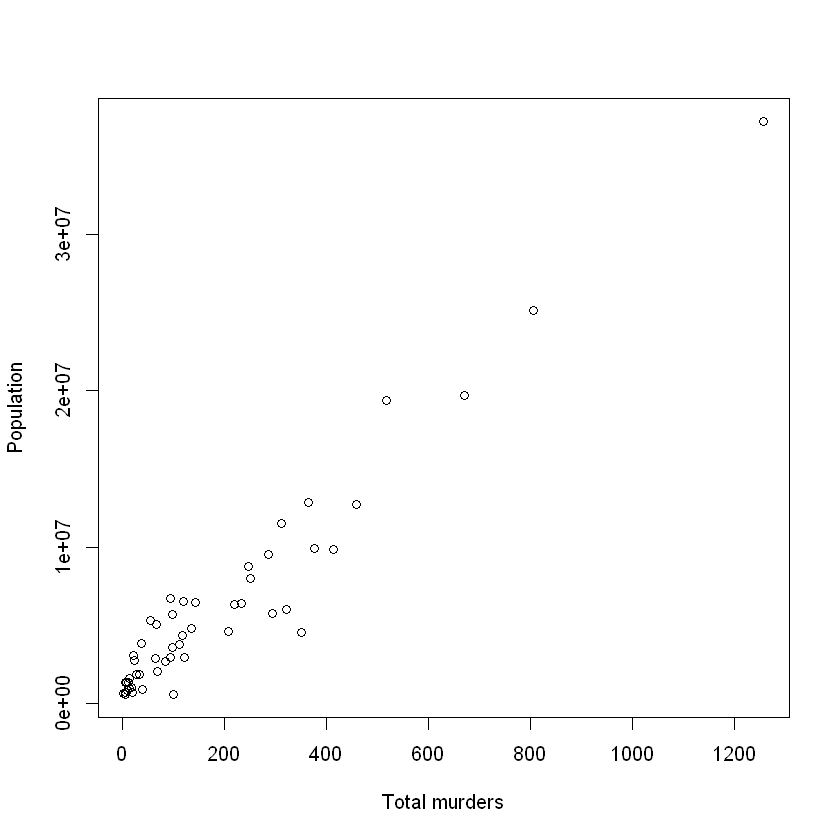

In [49]:
# Plot a graph between the population and their murder rates
plot (murders$total, murders$population, xlab = "Total murders", ylab = "Population")

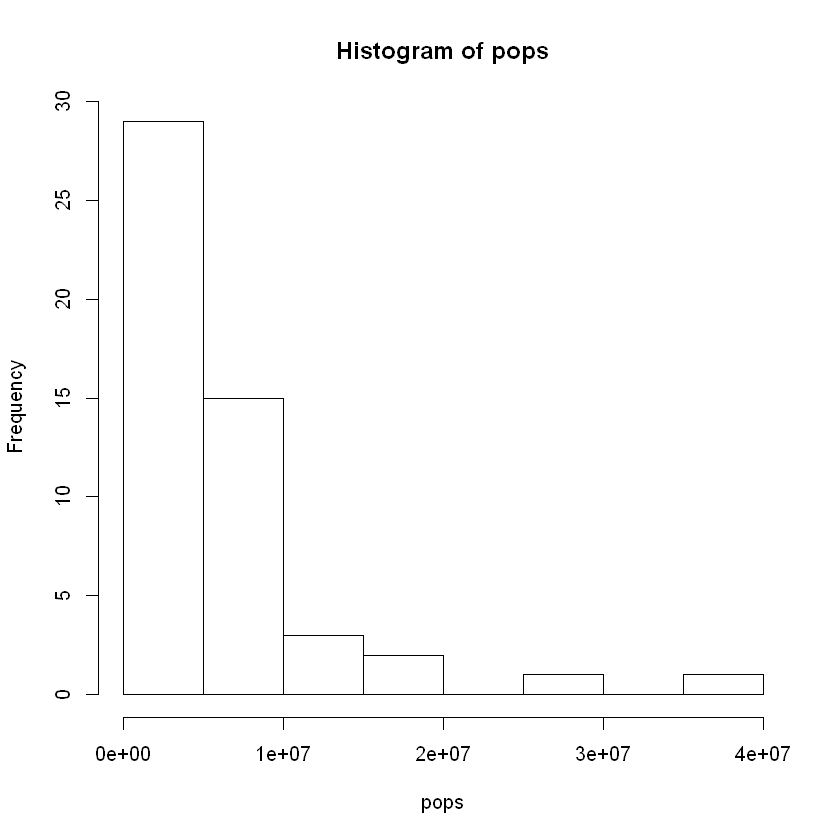

In [50]:
# Plot a histogram showing frequencies of different populations
hist (pops)

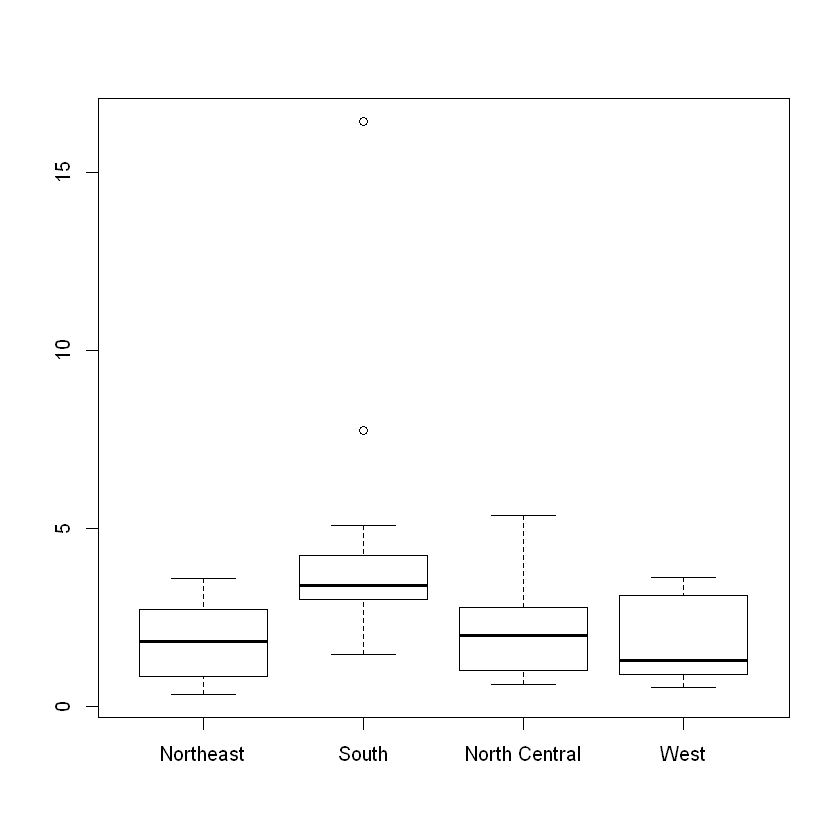

In [52]:
# Plot a boxplot for showing the regions in the dataset and their murder rates
boxplot (rate~region, data = murders)

This notebook ends here.